AI-POWERED FRAUD DETECTION SYSTEM

Build an AI-Powered Fraud Detection System capable of identifying fraudulent transactions in real-time, leveraging innovative machine learning approaches to minimize false positives and maximize the detection of actual frau d.

Description Design and implement an AI-powered fraud detection model that operates in real time, leveraging historical transaction data to discover and flag anomalies. Conventional or rule-based methods are not permitted. The emphasis is on creativity and innovation—solutions that demonstrate novel, effective approaches to fraud detection are highly enc ouraged.
Objective Successfully design, implement, and deploy a real-time fraud detection model that accurately identifies fraudulent transactions while minimizing false positives. The solution should demonstrate originality and effectiveness, prioritizing innovative approaches over conventional
![image.png](
  
)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats

In [2]:
# Set plot style
sns.set_style("whitegrid")

# Step 1: Read the dataset
df = pd.read_csv('Dataset.csv')

df = df.dropna()


In [3]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique Count: {df[col].nunique()}")
    print(f"Unique Values: {df[col].unique()[:10]}")  # display first 10 unique values



Column: step
Unique Count: 180
Unique Values: [ 11 172 106  86 152 161 145 141  84  80]

Column: customer
Unique Count: 4112
Unique Values: ["'C1760492708'" "'C1222389110'" "'C879949041'" "'C409740988'"
 "'C671449181'" "'C117112395'" "'C1449000407'" "'C1266329800'"
 "'C399777042'" "'C1750881279'"]

Column: age
Unique Count: 8
Unique Values: ["'1'" "'3'" "'5'" "'2'" "'4'" "'6'" "'U'" "'0'"]

Column: gender
Unique Count: 4
Unique Values: ["'F'" "'M'" "'E'" "'U'"]

Column: zipcodeOri
Unique Count: 1
Unique Values: ["'28007'"]

Column: merchant
Unique Count: 50
Unique Values: ["'M1823072687'" "'M692898500'" "'M348934600'" "'M1600850729'"
 "'M1946091778'" "'M85975013'" "'M1053599405'" "'M855959430'"
 "'M1535107174'" "'M151143676'"]

Column: zipMerchant
Unique Count: 1
Unique Values: ["'28007'"]

Column: category
Unique Count: 15
Unique Values: ["'es_transportation'" "'es_health'" "'es_fashion'"
 "'es_wellnessandbeauty'" "'es_food'" "'es_hyper'"
 "'es_barsandrestaurants'" "'es_home'" "'es_t

In [4]:
# Remove single quotes from all string values
df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

# Replace 'U' in age with NaN
df['age'] = df['age'].replace('U', pd.NA)

# Convert to numeric
df['age'] = pd.to_numeric(df['age'])

# Fill missing with median age
df['age'].fillna(df['age'].median(), inplace=True)

# Check result
print(df['age'].unique())

/tmp/ipython-input-4-4041886590.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)


[1. 3. 5. 2. 4. 6. 0.]


/tmp/ipython-input-4-4041886590.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [5]:
df.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,C1760492708,1.0,F,28007,M1823072687,28007,es_transportation,52.35,0
1,172,C1222389110,3.0,M,28007,M1823072687,28007,es_transportation,14.75,0
2,106,C879949041,3.0,F,28007,M1823072687,28007,es_transportation,3.73,0
3,86,C409740988,5.0,M,28007,M1823072687,28007,es_transportation,61.42,0
4,152,C671449181,3.0,F,28007,M692898500,28007,es_health,9.05,0


In [6]:
# Step 2: Show shape, missing values, data types, and class distribution
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nClass Distribution (Fraud):\n", df['fraud'].value_counts())

Dataset Shape: (535178, 10)

Missing Values:
 step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

Data Types:
 step             int64
customer        object
age            float64
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

Class Distribution (Fraud):
 fraud
0    528686
1      6492
Name: count, dtype: int64


In [7]:
df = df[~((df['amount'] == 1) & (df['fraud'] == 1))]


In [8]:
df.shape

(535178, 10)

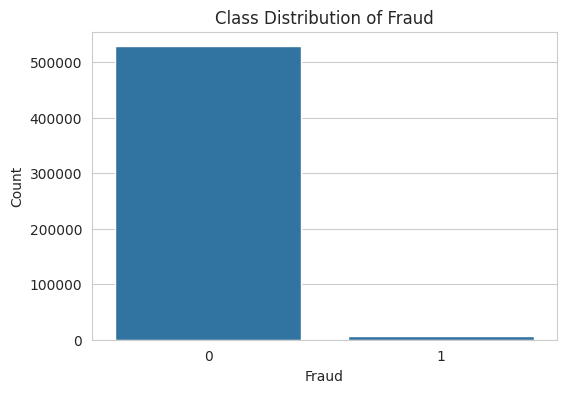

In [9]:
# Step 3: Visualize

# 3.1 Class distribution (countplot)
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=df)
plt.title('Class Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

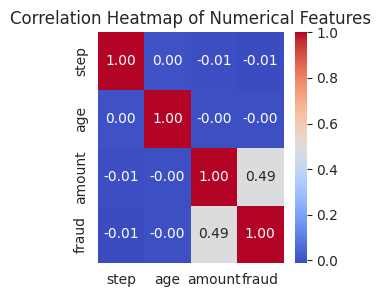

In [10]:
# 3.2 Correlation heatmap (top features)
# Select only numerical columns for correlation calculation
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(3,3))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [11]:
# Drop irrelevant columns
irrelevant_features = ['zipcodeOri', 'zipMerchant', 'customer', 'merchant']
df_cleaned = df.drop(columns=irrelevant_features)

# Show the updated DataFrame shape and preview
print("Shape after dropping irrelevant features:", df_cleaned.shape)
df_cleaned.head()

Shape after dropping irrelevant features: (535178, 6)


,step,age,gender,category,amount,fraud
0,11,1.0,F,es_transportation,52.35,0
1,172,3.0,M,es_transportation,14.75,0
2,106,3.0,F,es_transportation,3.73,0
3,86,5.0,M,es_transportation,61.42,0
4,152,3.0,F,es_health,9.05,0


Plots histograms for all numerical columns in your cleaned dataset,
except 'step' and 'fraud',
to show how values are distributed.

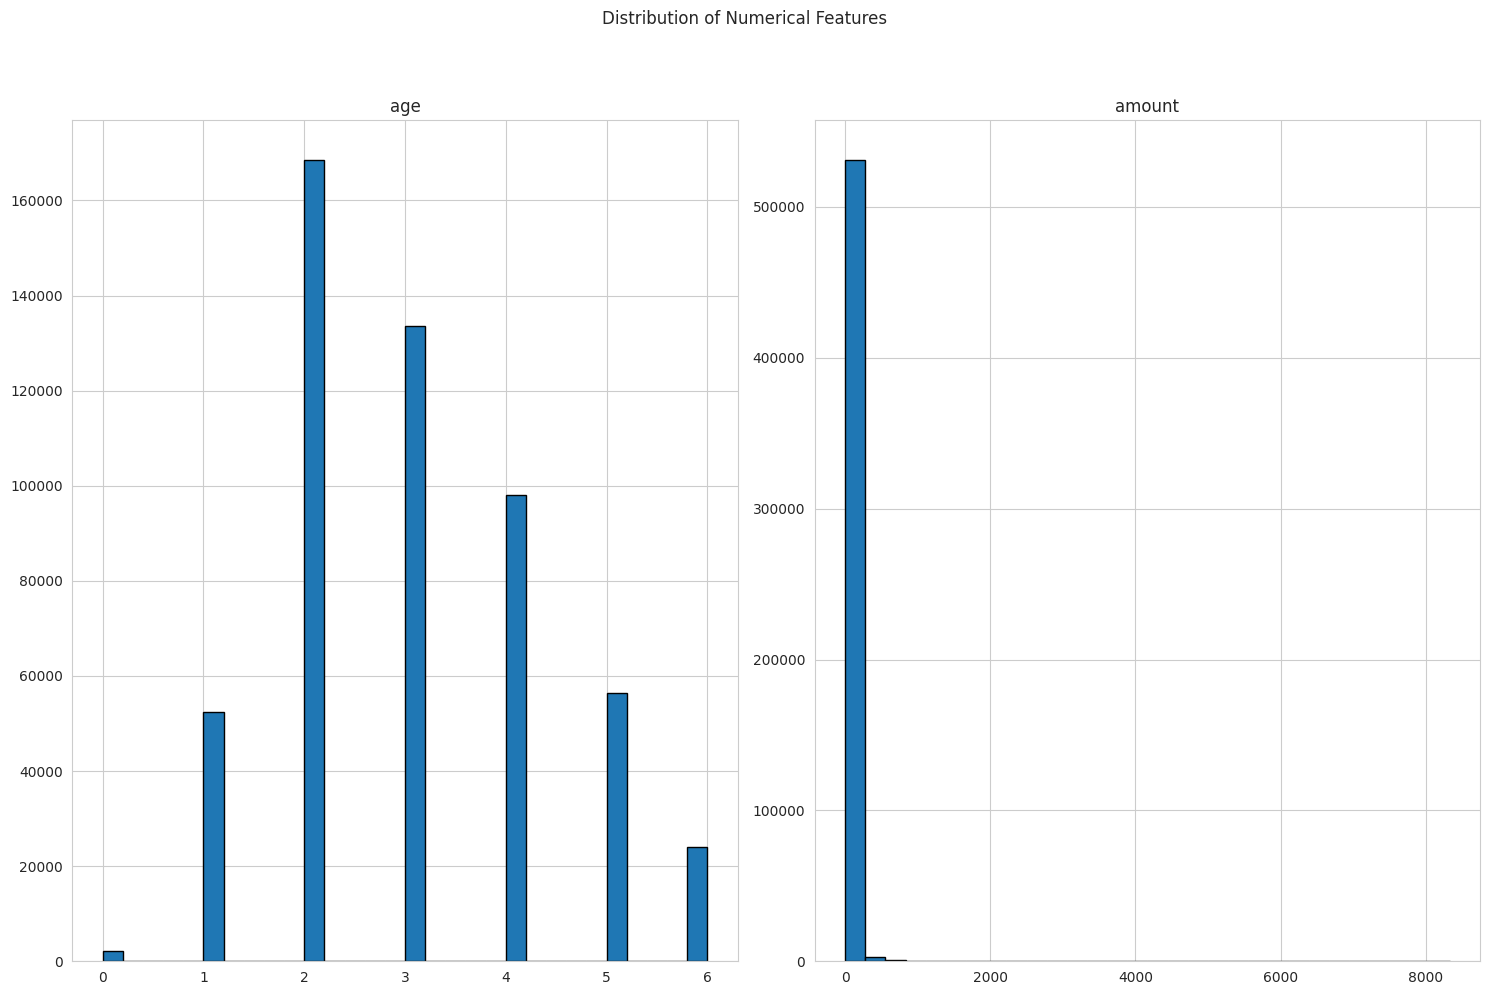

In [12]:
# 3.3 Distribution of numerical features (histograms)
# Exclude 'step' and 'fraud' for cleaner visualization if they are not truly continuous distributions
numerical_features_for_dist = df_cleaned.select_dtypes(include=np.number).columns.drop(['step', 'fraud'], errors='ignore')
if len(numerical_features_for_dist) > 0:
    df[numerical_features_for_dist].hist(bins=30, figsize=(15, 10), edgecolor='black')
    plt.suptitle('Distribution of Numerical Features', y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.show()

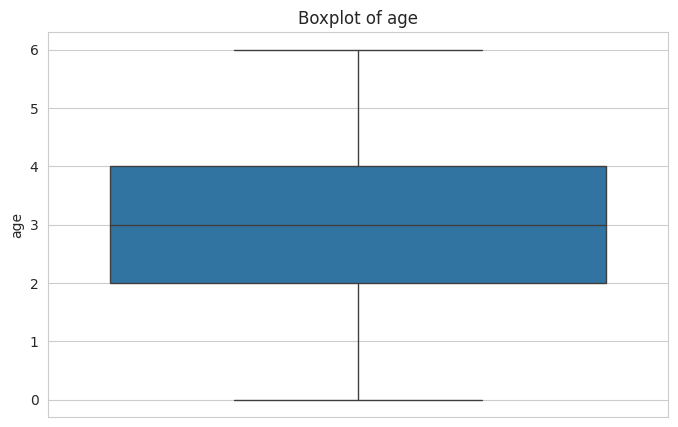

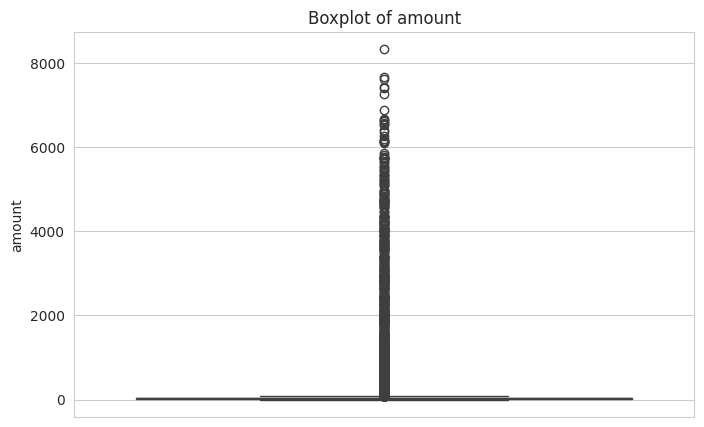

In [13]:
# 3.4 Boxplots to detect outliers
for col in numerical_features_for_dist:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

n real-world transaction data, most transactions are small (e.g., 10–500), but some can be huge (10,000+).

This creates a right-skewed distribution — where a few large values dominate the scale.

Skewed distributions can bias your model, especially for distance-based or linear models.

In [14]:
df_cleaned['log_amount'] = np.log1p(df_cleaned['amount'])


<Axes: ylabel='log_amount'>

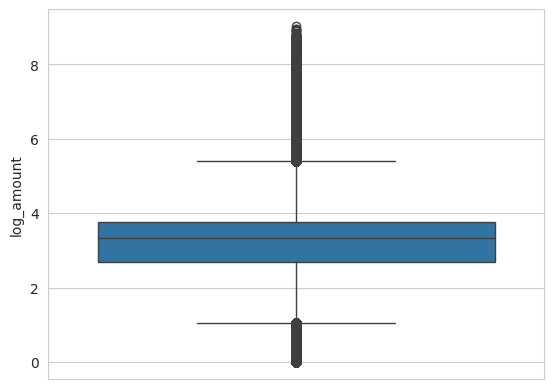

In [15]:
sns.boxplot(y='log_amount', data=df_cleaned)

In [16]:
pip install imbalanced-learn

In [17]:
# Step 4: Encode categorical features (Modified to use LabelEncoder for 'category')
# Identify categorical columns from the user's specified list that are of object type
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

print("\nCardinality of Categorical Features (after column selection):")
for col in categorical_cols:
    print(f"{col}: {df_cleaned[col].nunique()} unique values")

le = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    print(f"Label Encoded '{col}'.")


Cardinality of Categorical Features (after column selection):
gender: 4 unique values
category: 15 unique values
Label Encoded 'gender'.
Label Encoded 'category'.


In [18]:
df_cleaned

,step,age,gender,category,amount,fraud,log_amount
0,11,1.0,1,12,52.35,0,3.976874
1,172,3.0,2,12,14.75,0,2.756840
2,106,3.0,1,12,3.73,0,1.553925
3,86,5.0,2,12,61.42,0,4.133886
4,152,3.0,1,4,9.05,0,2.307573
...,...,...,...,...,...,...,...
535173,40,5.0,1,12,38.12,0,3.666634
535174,86,2.0,1,12,38.63,0,3.679586
535175,117,6.0,2,12,0.01,0,0.009950
535176,47,3.0,2,12,20.37,0,3.061988


In [19]:
# Step 5: Handle missing values
# Re-check for missing values after column selection and encoding
print("\nHandling Missing Values: (Re-checking after column selection and encoding)")
missing_values_count = df_cleaned.isnull().sum().sum()
if missing_values_count == 0:
    print("No missing values detected in the current dataset, skipping imputation.")
else:
    print(f"Missing values detected: {missing_values_count}.Imputation strategies would be applied here.")


Handling Missing Values: (Re-checking after column selection and encoding)
No missing values detected in the current dataset, skipping imputation.


Imagine amount is how much money was spent, and step is like a unit of time or how far into the transaction process you are.

When you divide amount by step, you're basically calculating a "spending speed" or "how much money is spent per unit of time/step."

In [20]:
# Step 7: Feature engineering if applicable.
# Example: Creating interaction terms or polynomial features.
# For this reduced dataset, 'amount' and 'step' are available.
if 'amount' in df_cleaned.columns and 'step' in df_cleaned.columns:
    # Add a small epsilon to the denominator to prevent division by zero
    df_cleaned['amount_per_step'] = df_cleaned['amount'] / (df_cleaned['step'] + 1e-6)
    print("\nEngineered 'amount_per_step' feature.")

# Log transform 'amount' if it's skewed and all values are positive
if 'amount' in df_cleaned.columns and (df_cleaned['amount'] > 0).all():
    df_cleaned['amount_log'] = np.log1p(df_cleaned['amount']) # log1p handles 0 gracefully, but we check for >0 anyway
    print("Engineered 'amount_log' feature.")
elif 'amount' in df_cleaned.columns:
    print("Skipping 'amount_log' engineering due to non-positive values in 'amount'.")


Engineered 'amount_per_step' feature.
Skipping 'amount_log' engineering due to non-positive values in 'amount'.


In [21]:
df_cleaned

,step,age,gender,category,amount,fraud,log_amount,amount_per_step
0,11,1.0,1,12,52.35,0,3.976874,4.759090
1,172,3.0,2,12,14.75,0,2.756840,0.085756
2,106,3.0,1,12,3.73,0,1.553925,0.035189
3,86,5.0,2,12,61.42,0,4.133886,0.714186
4,152,3.0,1,4,9.05,0,2.307573,0.059539
...,...,...,...,...,...,...,...,...
535173,40,5.0,1,12,38.12,0,3.666634,0.953000
535174,86,2.0,1,12,38.63,0,3.679586,0.449186
535175,117,6.0,2,12,0.01,0,0.009950,0.000085
535176,47,3.0,2,12,20.37,0,3.061988,0.433404


T-statistic (47.73): This number tells you how different the average amount is between fraudulent and non-fraudulent transactions, relative to how much variability there is within each group. A very large T-statistic (like 47.73) indicates a substantial difference in the average amount between the two groups.

P-value (0.000): This tells you the probability that you would see such a big difference in amount between the two groups if there was actually no real difference in the population. A P-value of 0.000 means this probability is extremely low (virtually zero).

In [22]:
# Step 8: Build null hypothesis if needed for statistical understanding (optional).
print("\nNull Hypothesis")
# This step is typically for statistical analysis and hypothesis testing, not direct data transformation.
# Example:
if 'amount' in df.columns and 'fraud' in df.columns:
      fraud_amounts = df[df['fraud'] == 1]['amount']
      non_fraud_amounts = df[df['fraud'] == 0]['amount']
      # Check if both groups have enough data for t-test
      if len(fraud_amounts) > 1 and len(non_fraud_amounts) > 1:
          t_stat, p_value = stats.ttest_ind(fraud_amounts, non_fraud_amounts, equal_var=False)
          print(f"T-statistic (amount vs fraud): {t_stat:.2f}, P-value: {p_value:.3f}")
      else:
          print("Not enough data in fraud/non-fraud groups for statistical test on 'amount'.")


Null Hypothesis
T-statistic (amount vs fraud): 47.73, P-value: 0.000


The strong T-statistic and extremely low P-value mean that amount is a very useful feature for distinguishing between fraudulent and non-fraudulent transactions. It suggests that the transaction amount is a powerful indicator for fraud detection in your dataset.

In [23]:
from sklearn.preprocessing import StandardScaler

# Step 9: Scale selected numerical features using StandardScaler
cols_to_scale = ['step', 'category', 'amount', 'log_amount', 'amount_per_step']
cols_to_keep = ['age', 'gender', 'fraud']

# Apply StandardScaler to selected columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[cols_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=df_cleaned.index)

# Combine scaled features with untouched columns
df_cleaned = pd.concat([scaled_df, df_cleaned[cols_to_keep]], axis=1)


In [24]:
df_cleaned

,step,category,amount,log_amount,amount_per_step,age,gender,fraud
0,-1.644891,0.331365,0.127946,0.837517,-0.030943,1.0,1,0
1,1.508484,0.331365,-0.206023,-0.438531,-0.030943,3.0,2,0
2,0.215796,0.331365,-0.303905,-1.696675,-0.030943,3.0,1,0
3,-0.175927,0.331365,0.208507,1.001737,-0.030943,5.0,2,0
4,1.116760,-2.506719,-0.256652,-0.908426,-0.030943,3.0,1,0
...,...,...,...,...,...,...,...,...
535173,-1.076892,0.331365,0.001553,0.513033,-0.030943,5.0,1,0
535174,-0.175927,0.331365,0.006083,0.526580,-0.030943,2.0,1,0
535175,0.431244,0.331365,-0.336946,-3.311537,-0.030943,6.0,2,0
535176,-0.939788,0.331365,-0.156106,-0.119374,-0.030943,3.0,2,0


In [25]:

# Step 10: Handle class imbalance using SMOTE.
X = df_cleaned.drop('fraud', axis=1)
y = df_cleaned['fraud']

In [26]:
print(f"\nOriginal X shape: {X.shape}, y shape: {y.shape}")
print(f"Original class distribution: {y.value_counts()}")

if len(y.unique()) > 1 and y.value_counts().min() > 0:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print(f"\nResampled X shape: {X_resampled.shape}, y shape: {y_resampled.shape}")
    print(f"Resampled class distribution: {y_resampled.value_counts()}")
else:
    print("\nCannot apply SMOTE: Either only one class present or minority class has 0 samples.")
    X_resampled, y_resampled = X, y


Original X shape: (535178, 7), y shape: (535178,)
Original class distribution: fraud
0    528686
1      6492
Name: count, dtype: int64

Resampled X shape: (1057372, 7), y shape: (1057372,)
Resampled class distribution: fraud
0    528686
1    528686
Name: count, dtype: int64


In [27]:
!pip install hpelm


--- Running ELM with various hpelm-supported activation functions ---

--- ELM Configuration: 100 neurons, 'sigm' activation ---
Training ELM with 100 neurons and 'sigm' activation...


/usr/local/lib/python3.11/dist-packages/hpelm/nnets/slfn.py:62: RuntimeWarning: overflow encountered in exp
  self.func["sigm"] = lambda X, W, B: 1 / (1 + np.exp(np.dot(X, W) + B))


ELM training complete.

--- ELM Evaluation Metrics ---
Precision: 0.9425
Recall (Sensitivity): 0.8931
F1 Score: 0.9172
AUC-ROC: 0.9727

--- ELM Model Visualizations ---


<Figure size 700x600 with 0 Axes>

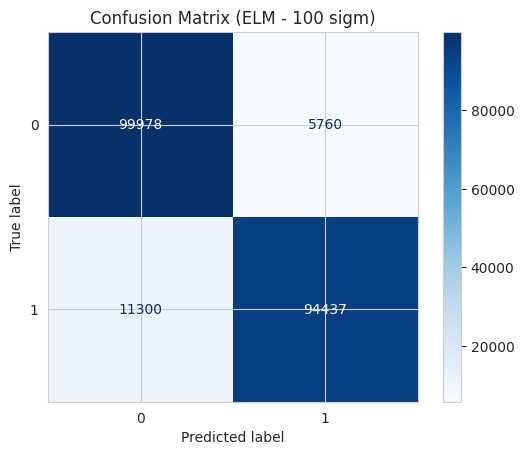

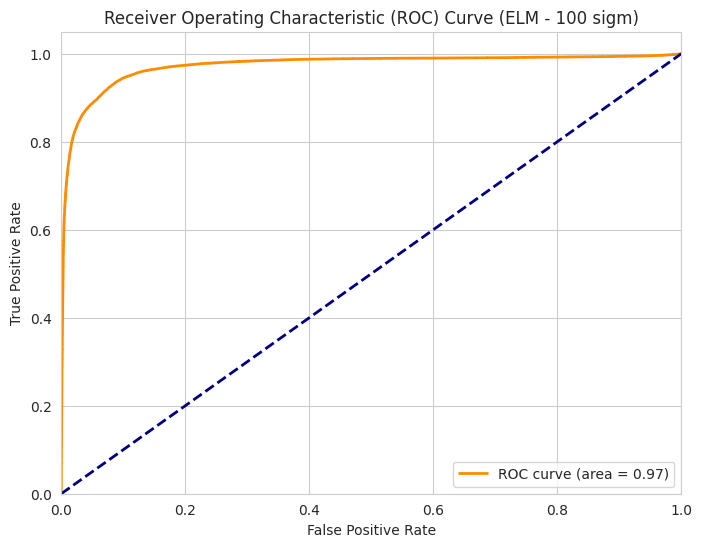

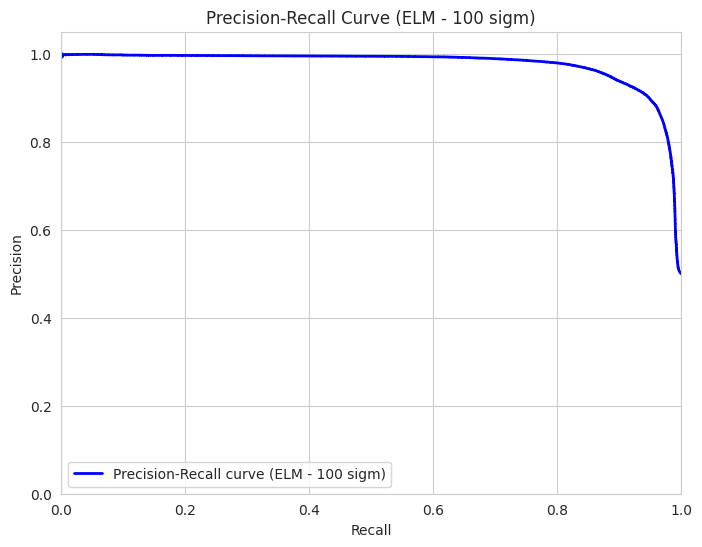


--- ELM Configuration: 200 neurons, 'sigm' activation ---
Training ELM with 200 neurons and 'sigm' activation...


/usr/local/lib/python3.11/dist-packages/hpelm/nnets/slfn.py:62: RuntimeWarning: overflow encountered in exp
  self.func["sigm"] = lambda X, W, B: 1 / (1 + np.exp(np.dot(X, W) + B))


ELM training complete.

--- ELM Evaluation Metrics ---
Precision: 0.9460
Recall (Sensitivity): 0.9159
F1 Score: 0.9307
AUC-ROC: 0.9815

--- ELM Model Visualizations ---


<Figure size 700x600 with 0 Axes>

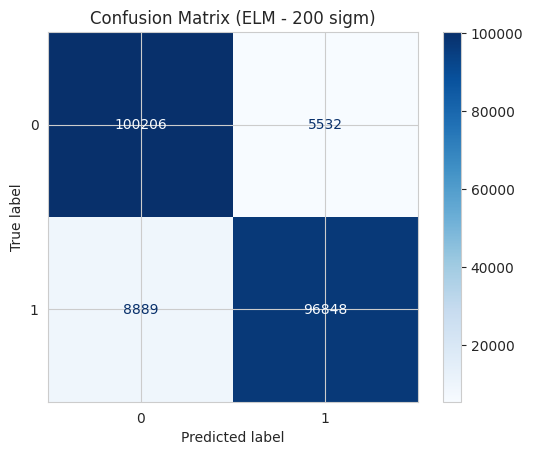

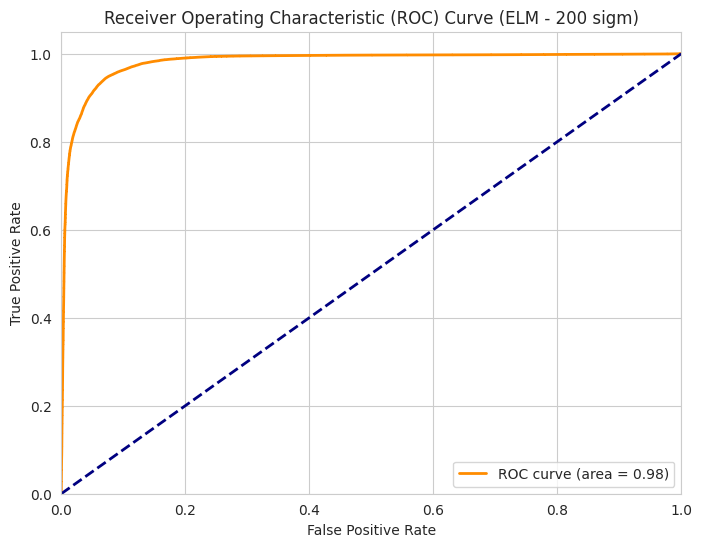

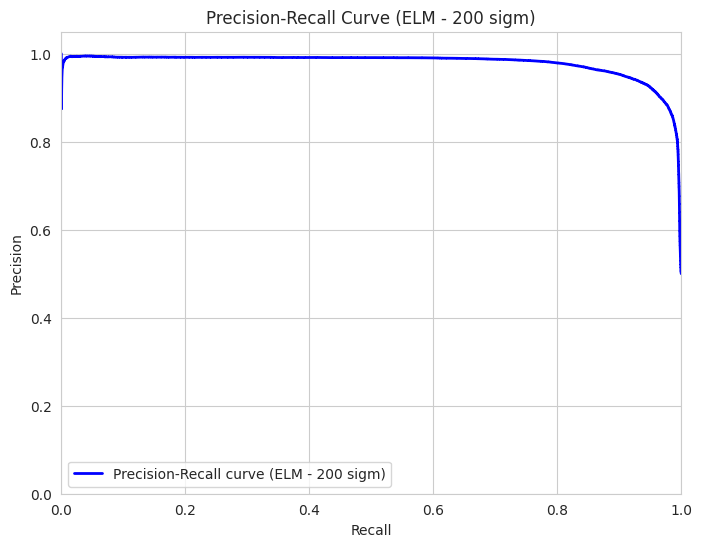

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, ConfusionMatrixDisplay

from hpelm import ELM
X = df_cleaned.drop('fraud', axis=1)
y = df_cleaned['fraud']

# SMOTE for class imbalance
if len(y.unique()) > 1 and y.value_counts().min() > 0:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    X_resampled, y_resampled = X, y

# Train-test split
if len(y_resampled.unique()) > 1 and y_resampled.value_counts().min() >= 2:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)
else:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert to NumPy arrays and explicitly ensure float type for ELM
X_train_np = X_train.to_numpy().astype(float)
y_train_np = y_train.to_numpy().reshape(-1, 1).astype(float) # Ensure target is float too
X_test_np = X_test.to_numpy().astype(float)


# --- Function to Train and Evaluate ELM with different parameters ---
def train_and_evaluate_elm(n_neurons, activation_function, X_train_data, y_train_data, X_test_data, y_test_true):
    print(f"\n--- ELM Configuration: {n_neurons} neurons, '{activation_function}' activation ---")

    elm = ELM(X_train_data.shape[1], 1)
    elm.add_neurons(n_neurons, activation_function)
    print(f"Training ELM with {n_neurons} neurons and '{activation_function}' activation...")
    elm.train(X_train_data, y_train_data)
    print("ELM training complete.")

    y_pred_proba_elm = elm.predict(X_test_data)
    y_pred_class_elm = (y_pred_proba_elm > 0.5).astype(int)

    # --- Metrics Evaluation ---
    print("\n--- ELM Evaluation Metrics ---")
    precision = precision_score(y_test_true, y_pred_class_elm)
    recall = recall_score(y_test_true, y_pred_class_elm)
    f1 = f1_score(y_test_true, y_pred_class_elm)
    roc_auc = roc_auc_score(y_test_true, y_pred_proba_elm)

    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")

    # --- Visualizations ---
    print("\n--- ELM Model Visualizations ---")

    plt.figure(figsize=(7, 6))
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test_true, y_pred_class_elm, cmap='Blues', values_format='d')
    cm_display.ax_.set_title(f'Confusion Matrix (ELM - {n_neurons} {activation_function})')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test_true, y_pred_proba_elm)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (ELM - {n_neurons} {activation_function})')
    plt.legend(loc="lower right")
    plt.show()

    precision_vals, recall_vals, _ = precision_recall_curve(y_test_true, y_pred_proba_elm)
    plt.figure(figsize=(8, 6))
    plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'Precision-Recall curve (ELM - {n_neurons} {activation_function})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (ELM - {n_neurons} {activation_function})')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="lower left")
    plt.show()

# --- Example Usage of the function with different parameters ---
print("\n--- Running ELM with various hpelm-supported activation functions ---")

# Configuration 1: Original parameters
train_and_evaluate_elm(n_neurons=100, activation_function="sigm",
                       X_train_data=X_train_np, y_train_data=y_train_np,
                       X_test_data=X_test_np, y_test_true=y_test)

# Configuration 2: More neurons, Sigmoid
train_and_evaluate_elm(n_neurons=200, activation_function="sigm",
                       X_train_data=X_train_np, y_train_data=y_train_np,
                       X_test_data=X_test_np, y_test_true=y_test)

